In [4]:
#Author : Sateesh K
#Date   : 17/May/2020
#Purpose: As a part of UpX project, this is a submission to complete Capstone project
#Guidelines: 
#Prepare the report in form of a power point presentation. Below
#are the guidelines for the report.
#a. Domain & topic of project
#b. Introduction (brief info on project)
#c. Dataset description
#d. Business questions identified (at least 7-8 questions)
#General format:
#Question 1
#Approach
#Findings & Visualizations
#e. Cleaning data and data imputation
#f. Train-test data split
#g. Model building, training and testing
#h. Performance metrics
#2. Use at least three algorithms learned from the Machine Learning track for the
#project.

In [5]:
#Load the data from .csv into a data-frame
import pandas as pd
initial_df = pd.read_csv('AirQualityUCI.csv')
initial_df.head()
initial_df.shape

(9471, 17)

In [6]:
#Check for null values
print(initial_df.isnull().sum())

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [7]:
#Print the null values of Date column to observe how the data looks.
initial_df[initial_df['Date'].isnull()]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Insert meaningful values for Date NaN
#Get 100 rows above the first NaN date value
initial_df.loc[9337:9357,:]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9337,4/3/2005,19:00:00,2.7,1248.0,-200.0,11.1,1018.0,367.0,599.0,181.0,1289.0,1167.0,19.9,33.0,0.7608,NaN,NaN
9338,4/3/2005,20:00:00,2.5,1180.0,-200.0,7.9,894.0,355.0,636.0,187.0,1200.0,1372.0,17.5,40.7,0.8073,NaN,NaN
9339,4/3/2005,21:00:00,1.5,1102.0,-200.0,6.0,812.0,235.0,693.0,158.0,1178.0,1042.0,16.4,46.6,0.8642,NaN,NaN
9340,4/3/2005,22:00:00,1.6,1116.0,-200.0,5.8,803.0,233.0,696.0,153.0,1173.0,1055.0,15.5,49.0,0.8579,NaN,NaN
9341,4/3/2005,23:00:00,1.2,1100.0,-200.0,5.1,769.0,170.0,722.0,128.0,1147.0,1049.0,14.3,52.5,0.8497,NaN,NaN
9342,4/4/2005,0:00:00,0.9,1012.0,-200.0,3.5,683.0,117.0,801.0,93.0,1073.0,816.0,14.2,51.4,0.8275,NaN,NaN
9343,4/4/2005,1:00:00,0.6,944.0,-200.0,1.9,579.0,70.0,925.0,58.0,1002.0,598.0,13.8,51.2,0.8058,NaN,NaN
9344,4/4/2005,2:00:00,0.5,912.0,-200.0,1.5,544.0,69.0,959.0,55.0,1002.0,573.0,12.1,56.3,0.7927,NaN,NaN
9345,4/4/2005,3:00:00,0.4,887.0,-200.0,1.1,508.0,62.0,1047.0,51.0,974.0,549.0,11.3,58.9,0.7888,NaN,NaN
9346,4/4/2005,4:00:00,-200.0,864.0,-200.0,0.8,478.0,52.0,1116.0,43.0,958.0,489.0,11.8,56.0,0.7743,NaN,NaN


In [9]:
#Observing the data, each data has a data point per hour
#However all the column of Date NaN also have a NaN
#Hence it makes sense to drop all NaN rows which amount to 114 data points out of 9471 data points = 0.11%
initial_df.dropna(subset=['Date'],inplace=True)
initial_df.info()
initial_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.3+ MB


(9357, 17)

In [10]:
#Now check if the Date filed no longer as NaN
initial_df[initial_df['Date'].isnull()]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16


## All NaN in Date filed are dropped off, hence lost 114 rows out of 9471 rows of data.


In [11]:
#Now check over-all NaN in data-set
#Check for null values
print(initial_df.isnull().sum())

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)            0
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9357
Unnamed: 16      9357
dtype: int64


In [12]:
#Column 15 and 16 has no valid data, so need to dop them as well.
initial_df.drop(initial_df.filter(regex="Unnamed"),axis=1, inplace=True)
initial_df.describe()
initial_df.shape

(9357, 15)

## As NaN in Date co-incided with NaN in other column, now there are no more NaN, Data is cleaned-up for further processing.


In [13]:
#Copy into a new Pandas Data-frame for clarity purposes only
cleaned_up_df = initial_df
initial_df.shape
cleaned_up_df.shape

(9357, 15)

In [14]:
#There is a problem with pandas_profile , hence ditching it. In fact pandas profile does not work even with a simple data-frame.

In [15]:
cleaned_up_df.head()
cleaned_up_df.shape

(9357, 15)

(9357, 15)

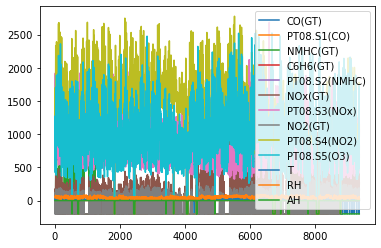

In [16]:
#Remove date and time for plotting purposes
temp_df = cleaned_up_df.copy()
temp_df.drop(columns=['Date','Time']) #This line causes error if executed mutiple times as 
#'Date' and 'Time' no longer esist after
#first run
temp_df.plot()
cleaned_up_df.shape

In [17]:
#From above graph it is clear that -200 is an invalid value which needs to be got rid of.
#The idea is to drop if -200 is found in more than two columns
#An attempt was made to drop all -200 values, but then the number of data points drop to from 9357 to 827, hence the logic
#of dropping rows where two columns have -200.
#filterinfDataframe = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
sub_set_df = cleaned_up_df[(cleaned_up_df['CO(GT)'] != -200) & (cleaned_up_df['PT08.S1(CO)'] != -200)]
sub_set_df.shape

(7344, 15)

(7344, 15)

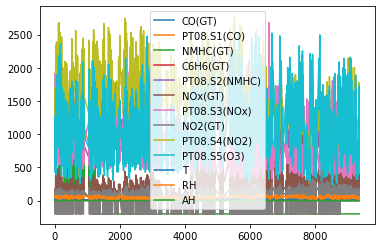

In [18]:
#Now you will see a more clean-plot
sub_set_df.plot()
sub_set_df.shape

In [19]:
#Count the remaining -200s in the data-set to decide how to proceed
print("In column CO(GT),  % of invalid values", (sub_set_df['CO(GT)'] == -200).sum(axis=0)/len(sub_set_df)*100)
print("In column PT08.S1(CO),  % of invalid values", (sub_set_df['PT08.S1(CO)'] == -200).sum(axis=0)/len(sub_set_df)*100)
print("In column NMHC(GT),  % of invalid values", (sub_set_df['NMHC(GT)'] == -200).sum(axis=0)/len(sub_set_df)*100)
print("In column C6H6(GT) % of invalid values", (sub_set_df['C6H6(GT)'] == -200).sum(axis=0)/len(sub_set_df)*100)
print("In column PT08.S2(NMHC) % of invalid values", (sub_set_df['PT08.S2(NMHC)'] == -200).sum(axis=0)/len(sub_set_df)*100)
print("In column NOx(GT) % of invalid values", (sub_set_df['NOx(GT)'] == -200).sum(axis=0)/len(sub_set_df)*100)
print("In column PT08.S3(NOx) % of invalid values", (sub_set_df['PT08.S3(NOx)'] == -200).sum(axis=0)/len(sub_set_df)*100)
print("In column NO2(GT) % of invalid values", (sub_set_df['NO2(GT)'] == -200).sum(axis=0)/len(sub_set_df)*100)
print("In column PT08.S4(NO2) % of invalid values", (sub_set_df['PT08.S4(NO2)'] == -200).sum(axis=0)/len(sub_set_df)*100)
print("In column PT08.S5(O3) % of invalid values", (sub_set_df['PT08.S5(O3)'] == -200).sum(axis=0)/len(sub_set_df)*100)
print("In column T % of invalid values", (sub_set_df['T'] == -200).sum(axis=0)/len(sub_set_df)*100)
print("In column RH % of invalid values", (sub_set_df['RH'] == -200).sum(axis=0)/len(sub_set_df)*100)
print("In column AH % of invalid values", (sub_set_df['AH'] == -200).sum(axis=0)/len(sub_set_df)*100)


In column CO(GT),  % of invalid values 0.0
In column PT08.S1(CO),  % of invalid values 0.0
In column NMHC(GT),  % of invalid values 88.24891067538127
In column C6H6(GT) % of invalid values 0.0
In column PT08.S2(NMHC) % of invalid values 0.0
In column NOx(GT) % of invalid values 5.446623093681917
In column PT08.S3(NOx) % of invalid values 0.0
In column NO2(GT) % of invalid values 5.487472766884531
In column PT08.S4(NO2) % of invalid values 0.0
In column PT08.S5(O3) % of invalid values 0.0
In column T % of invalid values 0.0
In column RH % of invalid values 0.0
In column AH % of invalid values 0.0


## As the NMHC(GT) contains 88% -200 values, this column is dropped off.

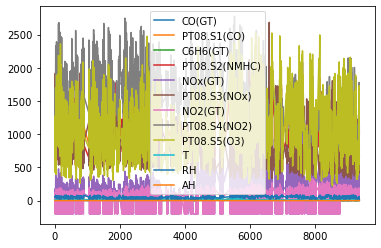

In [20]:
#Drop the column NMHC(GT)
sub_set_with_minimal_minus_200 = sub_set_df.drop(['NMHC(GT)'],axis=1)
sub_set_with_minimal_minus_200.shape
sub_set_with_minimal_minus_200.plot()

(6941, 14)

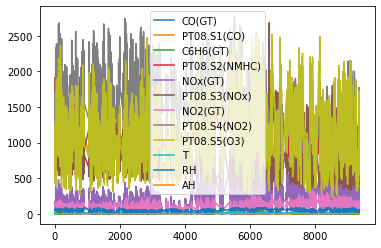

In [21]:
#Common -200 values in NOx(GT) and NO2(GT) can be removed as well.
fully_clean_df = sub_set_with_minimal_minus_200[(sub_set_with_minimal_minus_200['NOx(GT)'] != -200) & (sub_set_with_minimal_minus_200['NO2(GT)'] != -200)]
fully_clean_df.plot()
fully_clean_df .shape

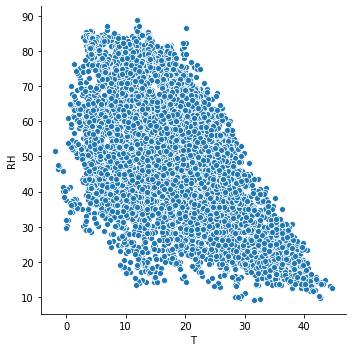

In [22]:
#Hypothesis 1
#Relative humidity and temperature are positively co-related
import seaborn as sns
sns.relplot(x='T', y='RH', data=fully_clean_df);

## Air temperature and Relative humidity are negatively co-related

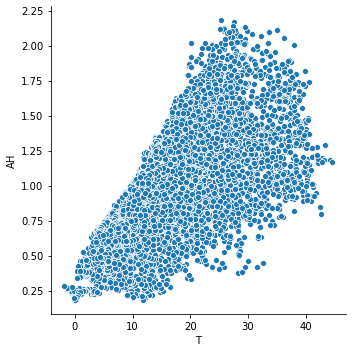

In [23]:
#Hypothesis 2: Absolute Humidity is negatively co-related to temperature
import seaborn as sns
sns.relplot(x='T', y='AH', data=fully_clean_df);

## As temperature increases Absolute humidity also increases

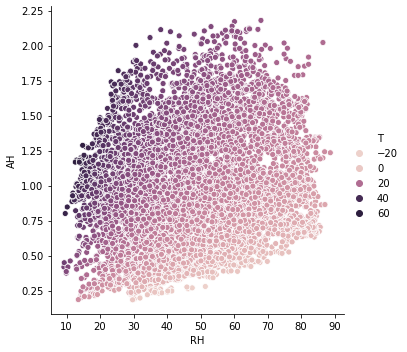

In [27]:
#Hypothesis 3: Absolute and relative humidity are positively co-related
import seaborn as sns
sns.relplot(x='RH', y='AH', hue='T', data=fully_clean_df);

## Absolute and Relative humidity are positively co-related.

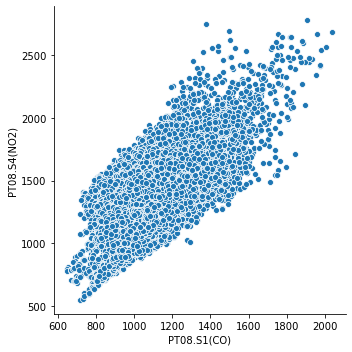

In [28]:
#Hypothesis 4: CO and NO2 are produced due to combustion in vehciles. They both are formed from very similar reactions, 
#hence they must be positively co-related.
import seaborn as sns
sns.relplot(x='PT08.S1(CO)', y='PT08.S4(NO2)', data=fully_clean_df);

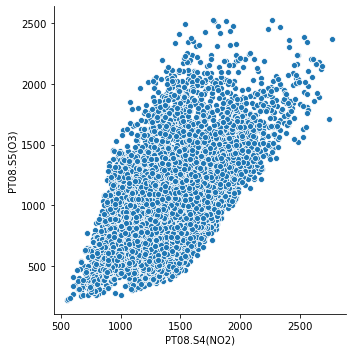

In [30]:
#Hypothesis 5: NO compounds cause creation of secondary pollutants like O3, hence NO and O3 should be positively co-related.
import seaborn as sns
sns.relplot(x='PT08.S4(NO2)', y='PT08.S5(O3)', data=fully_clean_df);